In [1]:
from qiskit import *
from math import pi,sqrt
from qiskit.visualization import plot_bloch_multivector,plot_histogram

In [2]:
backend_s = Aer.get_backend('statevector_simulator')
backend_q = Aer.get_backend('qasm_simulator')

# Single Qubit Gates

## Solutions

## 2. Digression: The X, Y & Z bases

## Quick Exercises

### 1. Verify that $|+\rangle$ and $|-\rangle$ are in fact eigenstates of the X-gate

$\normalsize X = \begin{bmatrix}0&1\\1&0\end{bmatrix}$

$\normalsize\left|\begin{matrix}-\lambda&1\\1&-\lambda\end{matrix}\right| = 0   \Longrightarrow \lambda^2-1 = 0 \Rightarrow \lambda=\pm1$

$\normalsize\begin{bmatrix}0&1\\1&0\end{bmatrix}\begin{bmatrix}a\\b\end{bmatrix} = \begin{bmatrix}a\\b\end{bmatrix}$  

$\normalsize\Rightarrow a = b$ and $\normalsize b = a$  

Hence one eigenstate is $\normalsize\begin{bmatrix}1\\1\end{bmatrix}.$

Similarly

$\normalsize\begin{bmatrix}0&1\\1&0\end{bmatrix}\begin{bmatrix}a\\b\end{bmatrix} = (-1)\begin{bmatrix}a\\b\end{bmatrix}$  

$\normalsize\Rightarrow a = -b$ and $\normalsize b = -a$  

The other eigenstate is $\normalsize\begin{bmatrix}1\\-1\end{bmatrix}$

These eigen states are the bases $\normalsize|+\rangle$ and $\normalsize|-\rangle$

### 2. What Eigenvalues do they have?  

As evident above, the $|+\rangle$ state corresponds to eigenvalue $\normalsize(+1),$ and $|-\rangle$ corresponds to eigenvalue $\normalsize(-1)$

### 3. Why would we not see these eigenvalues appear on the Bloch Sphere?  

These eigenvalues are what is called global phase on a state. We can only distinguish states on the Bloch sphere up to a global phase. Thus $2\normalsize|+\rangle$ and $1249\normalsize|+\rangle$ will have the same vector representation on the Bloch sphere.

### 4. Find the eigenstates of the Y-gate, and their co-ordinates on the Bloch sphere.

$\normalsize Y = \begin{bmatrix}0&-i\\i&0\end{bmatrix}$

$\normalsize\left|\begin{matrix}-\lambda&-i\\i&-\lambda\end{matrix}\right| = 0   \Longrightarrow \lambda^2+i^2 = \lambda^2-1 = 0 \Rightarrow \lambda=\pm1$

$\normalsize\begin{bmatrix}0&-i\\i&0\end{bmatrix}\begin{bmatrix}a\\b\end{bmatrix} = \begin{bmatrix}a\\b\end{bmatrix}$  

$\normalsize\Rightarrow -ib = a$ and $\normalsize ia = b$  

Hence one eigenstate is $\normalsize|\circlearrowleft\rangle = \begin{bmatrix}1\\i\end{bmatrix}.$

Similarly

$\normalsize\begin{bmatrix}0&-i\\i&0\end{bmatrix}\begin{bmatrix}a\\b\end{bmatrix} = (-1)\begin{bmatrix}a\\b\end{bmatrix}$  

$\normalsize\Rightarrow ib = a$ and $\normalsize ia = -b$  

The other eigenstate is $\normalsize|\circlearrowright\rangle = \begin{bmatrix}1\\-i\end{bmatrix}.$

## 3. The Hadamard Gate

## Quick Exercises

### 1. Write the Hadamard Gate as the outer product of the vectors $|0\rangle, |1\rangle, |+\rangle$ and $|-\rangle$

$\Large(\normalsize|0\rangle\langle+|\Large) \normalsize + \Large(\normalsize|1\rangle\langle-|\Large)$

### 2. Show that applying the sequence of gates: HZH, to any qubit state is equivalent to applying an X-gate.

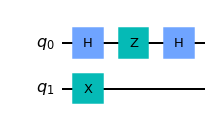

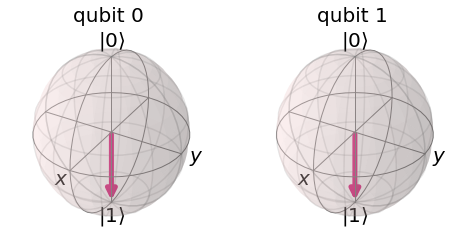

In [3]:
qc = QuantumCircuit(2)
qc.h(0)
qc.z(0)
qc.h(0)
qc.x(1)

display(qc.draw('mpl'))

# we use the statevector_simulator to obtain the statevector
job = execute(qc,backend_s)
job_result = job.result()
state_vec = job_result.get_statevector()
plot_bloch_multivector(state_vec)

We obtain the same state.

### 3. Find a combination of X, Z and H-gates that is equivalent to a Y-gate (ignoring global phase)

$iXZ$ gives $Y$. but $i$ is part of the global phase, so $XZ$ is equivalent to a $Y$ gate, as seen below:

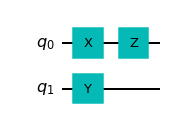

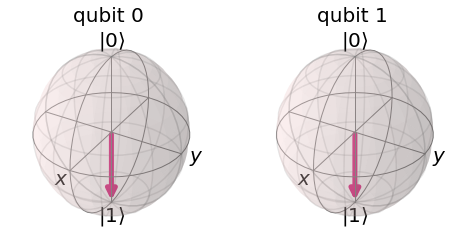

In [4]:
qc = QuantumCircuit(2)
qc.x(0)
qc.z(0)
qc.y(1)

display(qc.draw('mpl'))

job = execute(qc,backend_s)
job_result = job.result()
state_vec = job_result.get_statevector()
plot_bloch_multivector(state_vec)

## 4. Digression: Measuring in Different Bases

## Quick Exercises

### 1. If we initialise our qubit in the state  $|+\rangle$ , what is the probability of measuring it in state  $|-\rangle$?

We are expect measuring $|-\rangle$ to be an impossibility. To measure a qubit initialized in the $|+\rangle$ state, we will have to bring it to the Z (0-1) basis, by applying a Hadamard gate and then measuring. If our measurement outcome is $1$, then it means our initial state must have been $|-\rangle$ that particular percentage of times.

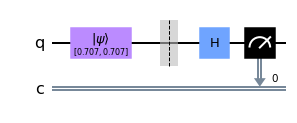

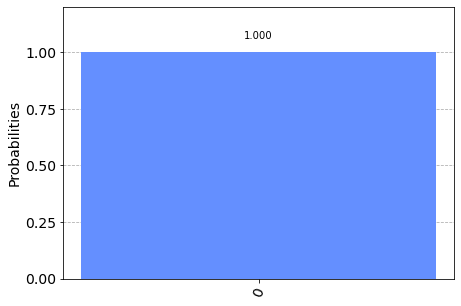

In [5]:
qc = QuantumCircuit(1,1)
# initialize qubit in state |+>
qc.initialize([1/sqrt(2),1/sqrt(2)],0)
qc.barrier()
qc.h(0)
qc.measure(0,0)

display(qc.draw('mpl'))

job = execute(qc, backend_q)
job_result = job.result()
res_counts = job_result.get_counts()
plot_histogram(res_counts)

The probability of measuring it in the state $|-\rangle$ is $0$, since all our measurements return 0, which correspond to the $|+\rangle$ state.

### 2. Use Qiskit to display the probability of measuring a  $|0\rangle$  qubit in the states  $|+\rangle$  and  $|-\rangle$ 

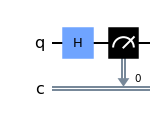

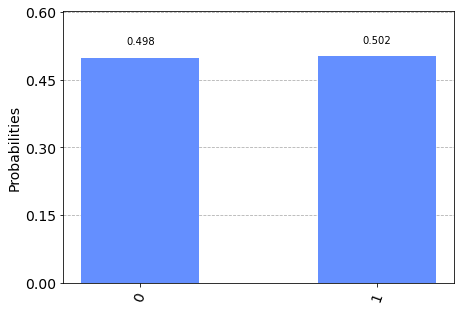

In [6]:
# initialize in |+> state:

qc = QuantumCircuit(1,1)
qc.h(0)
qc.measure(0,0)

display(qc.draw('mpl'))

job = execute(qc, backend_q,shots=4000)
job_result = job.result()
res_counts = job_result.get_counts()
plot_histogram(res_counts)

We get $|0\rangle$ around half the times and $|1\rangle$ remaining times.

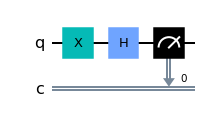

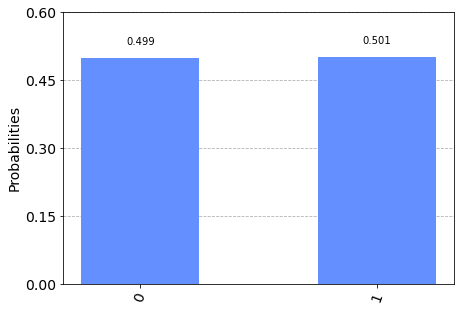

In [7]:
qc = QuantumCircuit(1,1)
qc.x(0)
qc.h(0)
qc.measure(0,0)

display(qc.draw('mpl'))

job = execute(qc, backend_q,shots=4000)
job_result = job.result()
res_counts = job_result.get_counts()
plot_histogram(res_counts)

### 3. Try to create a function that measures in the Y-basis.

A function that creates in the Y basis should manipulate the state so that it goes from being a Y eigenstate to a corresponding Z eigenstate, i.e. change Y basis to Z basis.  
We have seen above what the Y-basis vectors are:  
$\normalsize|\circlearrowleft\rangle = \begin{bmatrix}1\\i\end{bmatrix}$ and $\normalsize|\circlearrowright\rangle = \begin{bmatrix}1\\-i\end{bmatrix}.$

Our operation will be:

$\normalsize\begin{bmatrix}a&b\\c&d\end{bmatrix}\begin{bmatrix}1\\i\end{bmatrix} = \begin{bmatrix}1\\0\end{bmatrix}$  

and  

$\normalsize\begin{bmatrix}a&b\\c&d\end{bmatrix}\begin{bmatrix}1\\-i\end{bmatrix} = \begin{bmatrix}0\\1\end{bmatrix}$

We have four variables, and 4 equations, solving which, we will get the following as our operation matrix:

$\normalsize\begin{bmatrix}a&b\\c&d\end{bmatrix} = \Large\frac{1}{2}\normalsize\begin{bmatrix}1&-i\\1&i\end{bmatrix}$

We can multiply and verify that this matrix when multiplied by the Y-basis vectors will tranform them into the corresponding Z-basis states. We can then measure and reapply this state to get it back in the Y-basis state, as the textbook demonstrated for the X-basis.

Going a little ahead in the textbook, the $S^\dagger$ gate is introduced. The operation $HS^\dagger$ gives us the above matrix, so measuring in the Y basis will look like-

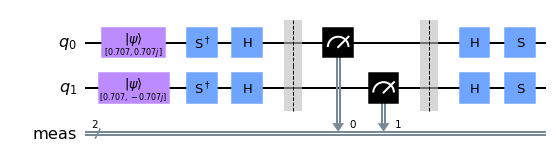

In [8]:
qc = QuantumCircuit(2)
qc.initialize([1/sqrt(2),1.j/sqrt(2)],0)
qc.initialize([1/sqrt(2),-1.j/sqrt(2)],1)
qc.sdg([0,1])
qc.h([0,1])
qc.measure_all()
qc.barrier()
qc.h([0,1])
qc.s([0,1])
qc.draw('mpl')

Why $S$ is used to recreate the state can be understood in the section that deals with the $S-$ and $S^\dagger-$gate.

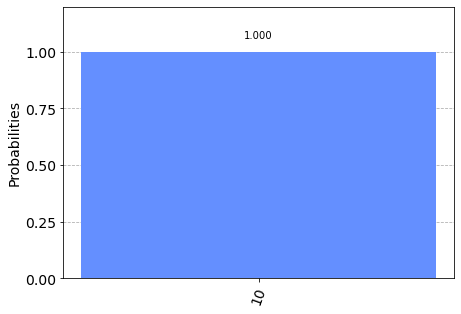

In [9]:
job = execute(qc,backend_q).result()
counts = job.get_counts()
plot_histogram(counts)

We can see the results are as expected: qubit $\normalsize q_0$ is always measured as $|0\rangle$, and $\normalsize q_1$ is always measured in $|1\rangle.$ As final confirmation, we check the bloch spheres for both these qubits.

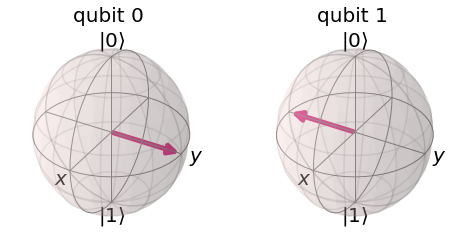

In [10]:
job = execute(qc,backend_s).result()
state_vec = job.get_statevector()
plot_bloch_multivector(state_vec)

## 6.1 The $I$ gate

## Quick Exercise

### 1. What are the eigenstates of the $I$-gate?

All vectors in the 2 dimensional Hilbert Space are the eigenstates of $I$-gate, since the eigen values of $I$-gate is just $1$.

In [11]:
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.16.1',
 'qiskit-aer': '0.7.1',
 'qiskit-ignis': '0.5.1',
 'qiskit-ibmq-provider': '0.11.1',
 'qiskit-aqua': '0.8.1',
 'qiskit': '0.23.1'}